In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data=make_blobs(n_samples=200,n_features=2,centers=2,cluster_std=1,random_state=101)

In [ ]:
X,y=data

In [ ]:
features_data=pd.DataFrame(X)

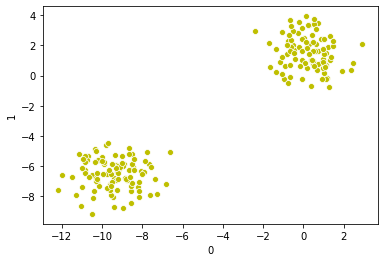

In [ ]:
sns.scatterplot(features_data[0],features_data[1],color='y')

In [ ]:
np.random.seed(101)
noise=np.random.normal(size=len(X))

In [ ]:
noise_df=pd.DataFrame(noise)

In [ ]:
features=pd.concat([features_data,noise_df],axis=1)

In [ ]:
features.columns=['FEATURE 1','FEATURE 2','FEATURE 3']

In [ ]:
features

,FEATURE 1,FEATURE 2,FEATURE 3
0,-10.261677,-7.063508,2.706850
1,-2.409022,2.935914,0.628133
2,-7.761505,-5.089419,0.907969
3,-11.145478,-5.219521,0.503826
4,-10.511634,-6.569922,0.651118
...,...,...,...
195,-0.718807,2.706116,0.688408
196,1.353957,1.256754,0.081523
197,-8.636387,-5.209855,-0.415191
198,2.357517,0.366993,0.053661


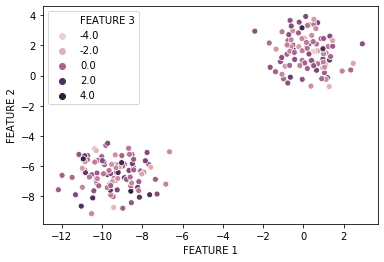

In [ ]:
sns.scatterplot(features['FEATURE 1'],features['FEATURE 2'],features['FEATURE 3'])

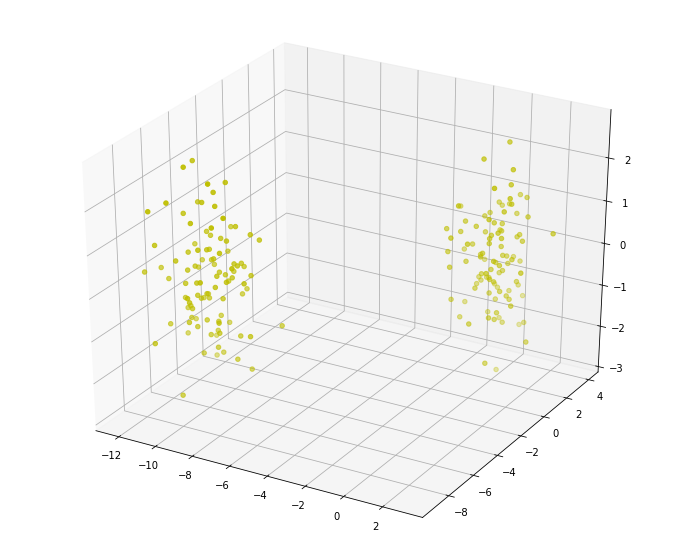

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(features['FEATURE 1'],features['FEATURE 2'],features['FEATURE 3'],color='y')



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
features_scaled=scaler.fit_transform(features)

In [ ]:
features_scaled.shape

(200, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
##3 -->2--->3

In [ ]:
encoder=Sequential()



In [ ]:
encoder.add(Dense(2,activation='relu',input_shape=[3]))

In [ ]:
decoder=Sequential()

In [ ]:
decoder.add(Dense(3,activation='relu',input_shape=[2]))

In [ ]:
Autoencoder=Sequential([encoder,decoder])

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
Autoencoder.compile(loss='mse',optimizer=SGD(lr=0.5))

In [ ]:
Autoencoder.fit(features_scaled,features_scaled,epochs=5,verbose =2)

Train on 200 samples
Epoch 1/5
200/200 - 1s - loss: 0.1573
Epoch 2/5
200/200 - 0s - loss: 0.1374
Epoch 3/5
200/200 - 0s - loss: 0.1316
Epoch 4/5
200/200 - 0s - loss: 0.1296
Epoch 5/5
200/200 - 0s - loss: 0.1291


In [ ]:
reduced_dims_data=encoder.predict(features_scaled)

In [ ]:
reduced_dims_data.shape

(200, 2)

In [ ]:
features_scaled.shape

(200, 3)

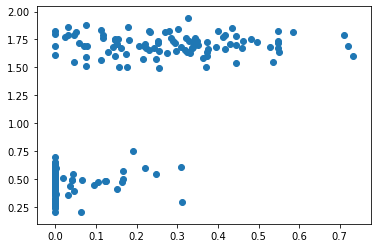

In [ ]:
plt.scatter(reduced_dims_data[:,0],reduced_dims_data[:,1])